Результат скидывать на почту tt48@mail.ru в виде файла *.ipynb<br>
В теме письма указывать, что это второй курс и что это "системы аналитических вычислений" или "пакеты". + номер ДЗ туда же.<br>
В содержании письма указывать ФИО и группу.

<h1>Задание 1 - часть 1 - Квадратик</h1>
Доделать начинания, что были на занятии:<br>
при помощи функции отображения графиков отобразить квадратик.<br>
Задав квадратик матрицей координат, повернуть и сдвинуть его относительно исходного положения.<br>
Вывести исходный квадратик и результат.


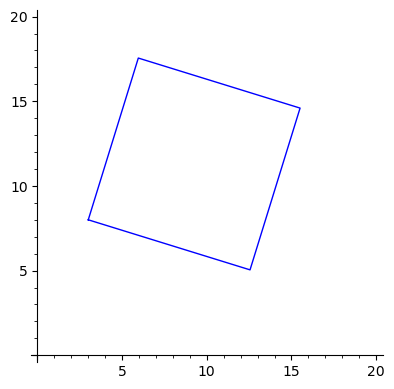

In [1]:
import math 

a = 10 #square side
alpha = 0.3 #rotating angle (radians)
square = matrix([[0,0], [0,a], [a,a], [a,0], [0,0]])

rotation_matrix = matrix([
                            [cos(alpha), -sin(alpha)],
                            [(sin(alpha)),(cos(alpha))]
                        ])

rotated_square = square * rotation_matrix

dx = 3 
dy = 8
carryover_vector = vector([dx, dy])

for i in range(square.nrows()):
    rotated_square[i] += carryover_vector

show(line(rotated_square), xmin=0, xmax=20, ymin=0, ymax=20, aspect_ratio=1)

<h1>Задание 1 - часть 2 - Исследование функции</h1>
Для заданной формулой функции найти:
<ol>
    <li>Область определения функции.</li>
    <li>Является ли функция четной или нечетной, является ли периодической.</li>
    <li>Точки пересечения графика с осями координат.</li>
    <li>Промежутки знакопостоянства.</li>
    <li>Промежутки возрастания и убывания.</li>
    <li>Точки экстремума и значения в этих точках.</li>
    <li>Непрерывность. Наличие точек разрыва и их классификация.</li>
    <li>Асимптоты.</li>
</ol>
Построить график функции, асимптоты, промежутки знакопостоянства. (см. папку с материалами).<br>
Необходимо также сделать минимальное, но оформление решения, а не просто набор ответов.

<h4>Справочные материалы:</h4>
<ol>
    <li>Гусак, 1999г. - исследование графиков</li>
    <li>Ефимов, Поспелов — т.2, стр. 86</li>
    <li>Ильин, Поздняк — т.1, стр. 143 и стр. 300-327</li>
    <li>Пискунов — стр. 144-184</li>
</ol>

<h1>Варианты:</h1>

In [2]:
tasks = [ 
            sin(2*x**3)**2/x**3  # исправлен
            , (x**2 - 4)*sin((pi*(x**2))/6) / (x**2 - 1)
            , sqrt(abs(3*x^3 + 2*x^2 - 10*x)) / (4*x)
            , 1/2 * ln(sqrt(x^2 + 1) / sqrt(x^2 - 1)) - 15*x**2
            , (x^3 - x^2 - x + 1)^(1/3) / tan(x)
            , 2*log((x - 1) / x) + 1
            , ln(x - 1) / (x - 1)^2
        ]

В your_number присвоить ваш номер по списку в рейтинге.
Рейтинги ваши лежат <a href='https://docs.google.com/spreadsheets/d/14cdxMHQw2Bd4i_4qoYWzV4olXgaNuckR6ZzWLCQQEUg/edit?usp=sharing'>здесь</a>

In [3]:
def get_variant_for_number(_number, _variations_quo):
    return (_number - 1) % _variations_quo


your_number = 2  # сюда вбить ваш номер по списку в рейтинге 
number_of_your_task = get_variant_for_number(_number=your_number, _variations_quo=len(tasks))
print(f"Номер вашего задания: {number_of_your_task}.")
show("Ваша функция: ", tasks[number_of_your_task])

Номер вашего задания: 1.


'Ваша функция: ' (x^2 - 4)*sin(1/6*pi*x^2)/(x^2 - 1)

Для начала зададим функцию и нарисуем её график

In [4]:
f(x) = (x**2 - 4) * sin((pi*(x**2))/6) / (x**2 - 1)

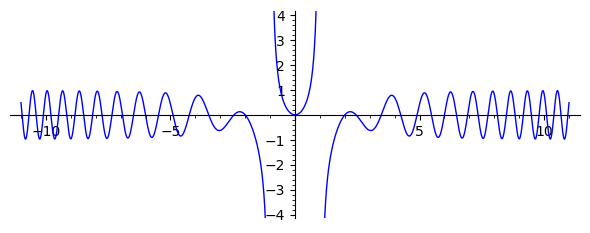

In [5]:
plot(f.simplify(), ymax=4, xmin=-11, xmax=11,ymin=-4, exclude = [-1,1],aspect_ratio=1)

#### 1. Область определения функции. 
Числитель функции может принимать любые значения $x$. Знаменатель так же может принимать любые значения $x$, но при этом он не должен равняться нулю. Знаменатель равняется нулю в следующих случаях:
$\left[ 
      \begin{gathered} 
        x = 1; \\ 
        x = -1, \\ 
      \end{gathered} 
\right.$

In [6]:
var('x')
D = solve([(x != -1), (x != 1)], x,  algorithm='sympy')
D

[[[-Infinity < x, x < -1]], [[-1 < x, x < 1]], [[1 < x, x < +Infinity]]]

#### 2. Является ли функция четной или нечетной, является ли периодической.
По графику видно, что функция симметрична относительно прямой $x=0$, значит функция чётная. Но проверим это еще и аналитически:

Функция $f(x)$ называется чётной, если справедливо равенство:
$f(-x)=f(x), \forall x \in X$.

Функция $f(x)$ называется нечётной, если справедливо равенство:
$ f(-x)=-f(x), \forall x \in X$.

In [7]:
f(x) - f(-x)

0

In [8]:
(f(-x) + f(x)).simplify()

2*(x^2 - 4)*sin(1/6*pi*x^2)/(x^2 - 1)

Подтвердили аналитически $\textbf{чётность}$  функции.<br>
Теперь проверим переодичность аналитически, хотя из графика и видно,что функция не переодическая.

In [9]:
var("x T")
eq1 = f(x) - f(x + T)
show(eq1.simplify_full())

-(((2*T*x^3*sin(1/6*pi*T^2) + x^4*sin(1/6*pi*T^2) + (T^2 - 5)*x^2*sin(1/6*pi*T^2) - 2*T*x*sin(1/6*pi*T^2) - (T^2 - 4)*sin(1/6*pi*T^2))*cos(1/3*pi*T*x) + (2*T*x^3*cos(1/6*pi*T^2) + x^4*cos(1/6*pi*T^2) + (T^2 - 5)*x^2*cos(1/6*pi*T^2) - 2*T*x*cos(1/6*pi*T^2) - (T^2 - 4)*cos(1/6*pi*T^2))*sin(1/3*pi*T*x))*cos(1/6*pi*x^2) - (2*T*x^3 + x^4 + (T^2 - 5)*x^2 - 4*T^2 - 8*T*x - (2*T*x^3*cos(1/6*pi*T^2) + x^4*cos(1/6*pi*T^2) + (T^2 - 5)*x^2*cos(1/6*pi*T^2) - 2*T*x*cos(1/6*pi*T^2) - (T^2 - 4)*cos(1/6*pi*T^2))*cos(1/3*pi*T*x) + (2*T*x^3*sin(1/6*pi*T^2) + x^4*sin(1/6*pi*T^2) + (T^2 - 5)*x^2*sin(1/6*pi*T^2) - 2*T*x*sin(1/6*pi*T^2) - (T^2 - 4)*sin(1/6*pi*T^2))*sin(1/3*pi*T*x) + 4)*sin(1/6*pi*x^2))/(2*T*x^3 + x^4 + (T^2 - 2)*x^2 - T^2 - 2*T*x + 1)

In [10]:
solve(eq1, T, algorithm='sympy')

Complement(ConditionSet(T, Eq(-(x**2 - 4)*((T + x)**2 - 1)*sin(pi*x**2/6) + (x**2 - 1)*((T + x)**2 - 4)*sin(pi*(T**2/6 + T*x/3 + x**2/6)), 0), Complexes), FiniteSet(1 - x, -x - 1))

Делаем вывод, что функция $\textbf{не переодическая}$

#### 3. Точки пересечения графика с осями координат.

In [11]:
solve(f==0, x, algorithm='sympy')

[[x == -2, x == 2],
 Complement(ConditionSet(x, Eq(sin(pi*x**2/6), 0), Complexes), FiniteSet(-1, 1))]

Корнями являются точки -2, 2 и точки, в которых синус принимает значение нуля. Так как синус переодическая функция, то корней будет бесконечно много.<br>
Несколько примеров корней:

In [12]:
find_root(f(x)==0, -5, -4.5), find_root(f(x)==0, 10, 11), find_root(f(x)==0, 3, 3.5)
#find_root(f(x)==0, 3, 3.1)

(-4.898979485566353, 10.954451150103319, 3.464101615137755)

$\textit{Примечание:}$ если задать промежуток, в котором нет корней для функции find_root, то при вычислении получим ошибку

#### 4. Промежутки знакопостоянства.
Функция $f(x)$ имеет бесконечно много корней, поэтому рассмотрим только наиболее интересный промежуток в окрестности нуля

In [13]:
show(solve(f(x)>=0, x, to_poly_solve=True))

[[sin(1/6*pi*x^2) == 0, x + 1 != 0, x - 1 != 0],
 [x == -2, -1 != 0, -3 != 0],
 [x == 2, 3 != 0, 1 != 0],
 [2 < x, sin(1/6*pi*x^2) > 0],
 [-1 < x, x < 1, sin(1/6*pi*x^2) > 0],
 [x < -2, sin(1/6*pi*x^2) > 0],
 [1 < x, x < 2, -sin(1/6*pi*x^2) > 0],
 [-2 < x, x < -1, -sin(1/6*pi*x^2) > 0]]

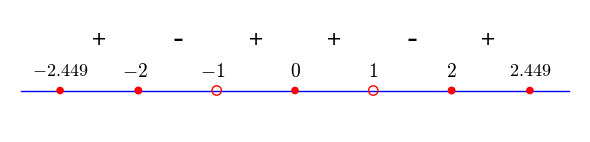

In [14]:
# отрисовка отрезка - основная линия для графика промежутков знакопостоянства
intervals_of_constancy = plot(0, xmin=-3.5, xmax=3.5, ymin=-0.5, ymax=1)

# добавление красных маркеров - отметки точек\маркеров
intervals_of_constancy  += point((-2,0), color="red", size=30, zorder=10)
intervals_of_constancy  += point((2, 0), color="red", size=30,  zorder=10)
intervals_of_constancy  += point((-2,0), color="red", size=30, zorder=10)
intervals_of_constancy  += point((2, 0), color="red", size=30,  zorder=10)
intervals_of_constancy  += point((0, 0), color="red", size=30,  zorder=10)
intervals_of_constancy  += point((-3, 0), color="red", size=30,  zorder=10)
intervals_of_constancy  += point((3, 0), color="red", size=30,  zorder=10)
intervals_of_constancy  += circle((-1, 0), 0.06, color='red')
intervals_of_constancy  += circle((1, 0), 0.06, color='red')

# здесь добавляем подписи точек (значения по оси X)
intervals_of_constancy  += text("$0$", (0, 0.25), color="black", fontsize=14)
intervals_of_constancy  += text("$-2$", (-2.05, 0.25), color="black", fontsize=14)
intervals_of_constancy  += text("$2$", (2, 0.25), color="black", fontsize=14)
intervals_of_constancy  += text("$-1$", (-1.05, 0.25), color="black", fontsize=14)
intervals_of_constancy  += text("$1$", (1, 0.25), color="black", fontsize=14)
intervals_of_constancy  += text("$-2.449$", (-3, 0.25), color="black", fontsize=13)
intervals_of_constancy  += text("$2.449$", (3, 0.25), color="black", fontsize=13)

# Здесь добавляем подписи знаков промежутков знакопостоянства
y_margin = 0.65  # смещение по оси Y элемента подписи, чтобы он не наслаивался на линию
intervals_of_constancy  += text("+ ", (2.5 , y_margin), color="black", fontsize=14) 
intervals_of_constancy  += text("+", (-0.5 , y_margin), color="black", fontsize=14)
intervals_of_constancy  += text("+", (0.5 , y_margin), color="black", fontsize=14)
intervals_of_constancy  += text("-", (-1.5 , y_margin), color="black", fontsize=22)
intervals_of_constancy  += text("-", (1.5 , y_margin), color="black", fontsize=22)
intervals_of_constancy  += text("+", (-2.5 , y_margin), color="black", fontsize=14)

# оси не нужны - скрываем
intervals_of_constancy.show(axes=False)

Далее знаки будут чередоваться<br>
$\textit{Примечание:}$ масштаб на оси нарушен для большей наглядности.

#### 5. Промежутки возрастания и убывания
Для начала посчитаем производную нашей функции.

In [15]:
f_deriv = f.derivative()
f_deriv.show()

x |--> 1/3*pi*(x^2 - 4)*x*cos(1/6*pi*x^2)/(x^2 - 1) + 2*x*sin(1/6*pi*x^2)/(x^2 - 1) - 2*(x^2 - 4)*x*sin(1/6*pi*x^2)/(x^2 - 1)^2

In [16]:
show(solve(f_deriv>=0, x))

[[pi*x^4*cos(1/6*pi*x^2) - 5*pi*x^2*cos(1/6*pi*x^2) + 4*pi*cos(1/6*pi*x^2) + 18*sin(1/6*pi*x^2) == 0,
  x + 1 != 0,
  x - 1 != 0],
 [x == 0, 1 != 0, -1 != 0],
 [0 < x,
  pi*x^4*cos(1/6*pi*x^2) - 5*pi*x^2*cos(1/6*pi*x^2) + 4*pi*cos(1/6*pi*x^2) + 18*sin(1/6*pi*x^2) > 0],
 [x < 0,
  -pi*x^4*cos(1/6*pi*x^2) + 5*pi*x^2*cos(1/6*pi*x^2) - 4*pi*cos(1/6*pi*x^2) - 18*sin(1/6*pi*x^2) > 0]]

Лучше нарисуем график, так будет гораздо понятней

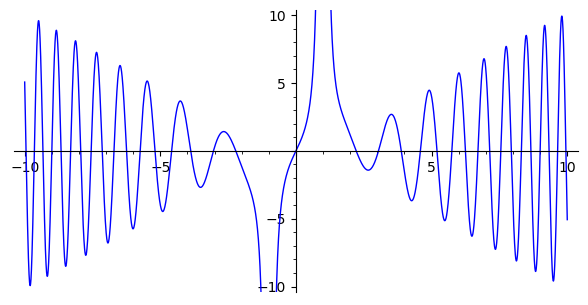

In [17]:
plot(f_deriv, xmin=-10, xmax=10, ymin=-10, ymax=10, aspect_ratio=1/2)

Нарисуем прямую знакопостоянства только для правой части, т.к левая строится аналогично

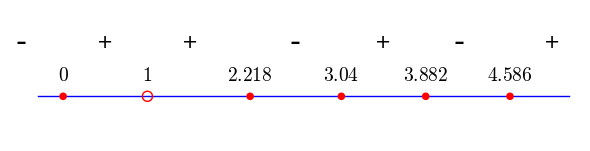

In [18]:
# отрисовка отрезка - основная линия для графика промежутков знакопостоянства
intervals_of_constancy = plot(0, xmin=-0.3, xmax=6, ymin=-0.5, ymax=1)

# добавление красных маркеров - отметки точек\маркеров
intervals_of_constancy  += point((0,0), color="red", size=30, zorder=10)
intervals_of_constancy  += point((2.218,0), color="red", size=30, zorder=10)
intervals_of_constancy  += point((3.3,0), color="red", size=30, zorder=10)  #3.04
intervals_of_constancy  += point((4.3,0), color="red", size=30, zorder=10)
intervals_of_constancy  += point((5.3,0), color="red", size=30, zorder=10)
intervals_of_constancy  += circle((1, 0), 0.06, color='red')


# здесь добавляем подписи точек (значения по оси X)
intervals_of_constancy  += text("$0$", (0, 0.25), color="black", fontsize=14)
intervals_of_constancy  += text("$1$", (1, 0.25), color="black", fontsize=14)
intervals_of_constancy  += text("$2.218$", (2.218, 0.25), color="black", fontsize=14)
intervals_of_constancy  += text("$3.04$", (3.3, 0.25), color="black", fontsize=14)
intervals_of_constancy  += text("$3.882$", (4.3, 0.25), color="black", fontsize=14)
intervals_of_constancy  += text("$4.586$", (5.3, 0.25), color="black", fontsize=14)

# Здесь добавляем подписи знаков промежутков знакопостоянства
y_margin = 0.65  # смещение по оси Y элемента подписи, чтобы он не наслаивался на линию
intervals_of_constancy  += text("-", (-0.5 , y_margin), color="black", fontsize=22)
intervals_of_constancy  += text("+", (0.5 , y_margin), color="black", fontsize=14)
intervals_of_constancy  += text("+", (1.5 , y_margin), color="black", fontsize=14)
intervals_of_constancy  += text("-", (2.75 , y_margin), color="black", fontsize=22)
intervals_of_constancy  += text("+", (3.8 , y_margin), color="black", fontsize=14)
intervals_of_constancy  += text("-", (4.7 , y_margin), color="black", fontsize=22)
intervals_of_constancy  += text("+", (5.8 , y_margin), color="black", fontsize=14)

# оси не нужны - скрываем
intervals_of_constancy.show(axes=False)

$\textit{Примечание:}$ масштаб на оси нарушен для большей наглядности.

#### 6. Точки экстремума и значения в этих точках.
Дня начала рассмотрим интервал $(-1; 1)$. На этом интервале очевидно один экстремум в нуле. Убедимся в этом, рассмотрев несколько точек в окрестности нуля (из чётности будем брать правую полуокрестность).

In [19]:
0, f(0)

(0, 0)

In [20]:
0.3, f(0.3)

(0.300000000000000, 4.29670329670330*sin(0.0150000000000000*pi))

In [21]:
0.15, f(0.15)

(0.150000000000000, 4.06905370843990*sin(0.00375000000000000*pi))

In [22]:
0.02, f(0.02)

(0.0200000000000000, 4.00120048019208*sin(0.0000666666666666667*pi))

Рассмотрим еще одну окрестность точки 3.882

In [23]:
3.882, f(3.882)

(3.88200000000000, 0.786779232069768*sin(2.51165400000000*pi))

In [24]:
4, f(4)

(4, 2/5*sqrt(3))

In [25]:
3.5, f(3.5)

(3.50000000000000, 0.733333333333333*sin(2.04166666666667*pi))

#### 7. Непрерывность. Наличие точек разрыва и их классификация.
Еще в первом пункте было установлено, что функция разрывна в точках -1 и 1. Выясним какого типа эти разрывы

In [26]:
limit(f(x), x=(-1),  dir='-'), limit(f(x), x=(-1), dir='+')

(-Infinity, +Infinity)

In [27]:
limit(f(x), x=(1), dir='-'), limit(f(x), x=(1), dir='+')

(+Infinity, -Infinity)

Как видим пределы слева и справа разные и являются бесконечными. Значит это разрывы второго рода, они не являются устранимыми

#### 8. Асимптоты.


Из предыдущего пункта задания можно сразу сделать вывод, что есть две вертикальные асимптоты: $x = -1$ , $x = 1$. Исследуем на горизонтальные асимптоты:

In [28]:
limit(f(x), x=infinity, dir='-'), limit(f(x), x=infinity, dir='+')

(ind, ind)

*ind - indefinite but bounded (неопределенный, но ограниченный)*<br> Горизонтальных асимптот нет.

Теперь исследуем на наклонные асимптоты: <br>
Наклонная асимптота — прямая вида $y=kx+b$, если выполняется хотя бы одно из равенств:

$\lim _{x\to +\infty }(f(x)-kx)=b$<br>
$\lim _{x\to -\infty }(f(x)-kx)=b$

Найдем коэффициент $k$:<br>
$k =  \lim _{x\to \infty }(f(x) / x)$

In [29]:
limit(f(x)/x, x=infinity, dir = '+'), limit(f(x)/x, x=infinity, dir = '-')

(0, 0)

Нашлось $k$ только для вертикальных прямых, значит наклонных асимптот нет.

Нарисуем асимптоты на графике:

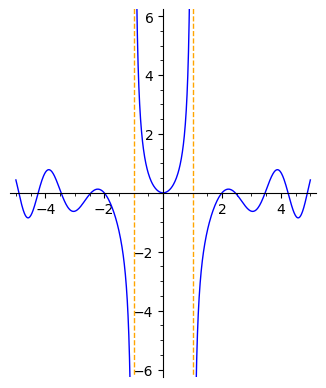

In [30]:
intervals_of_constancy = plot(f, ymax=6, ymin=-6, xmin=-5, xmax=5, exclude = [-1,1], aspect_ratio = 1/4)
var('t')
intervals_of_constancy += parametric_plot((1, t), (t, -7, 7), color ='orange', linestyle='--' )
intervals_of_constancy += parametric_plot((-1, t), (t, -7, 7), color ='orange', linestyle='--')
intervals_of_constancy.show()